<a href="https://colab.research.google.com/github/Renee751/Data_Analytics_Python_Github/blob/main/Global_CO2_Emissions_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format = "{:,.2f}".format

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
path = "/content/drive/MyDrive/Colab Notebooks/co2_emissions (2).csv"
emissions = pd.read_csv(path)
emissions.columns = ['country',	'1990','2005','2017','2021']  # Vervang "kolom1", "kolom2", enz. door de gewenste namen
emissions = emissions.loc[3:,:]
emissions.set_index("country", inplace = True)
emissions = emissions.loc[emissions.index != 'European Union']


In [10]:
%load_ext google.colab.data_table

In [11]:
emissions

,1990,2005,2017,2021
country,,,,
Afghanistan,2.55,1.06,11.42,8.35
Albania,6.58,4.20,5.03,4.59
Algeria,65.68,98.20,159.93,173.00
Angola,5.85,15.97,30.88,24.45
Anguilla,0.01,0.01,0.03,0.03
...,...,...,...,...
Vietnam,20.18,99.23,218.73,321.41
Western Sahara,0.14,0.23,0.28,0.24
Yemen,6.89,21.77,12.50,12.05


In [25]:
# Graph emissions: 5 biggest producers 22021.
top_5 = emissions.nlargest(5, '2021')
top_5 # geeft de top 5 weer.

#####  Testing
emissions.columns.values.tolist() # X as - years
emissions.loc[emissions.index.str.contains('China')].values.flatten() # Values per lijn


array([ 2397.05,  6263.06, 10877.22, 12466.32,   261.28,   453.78,
         520.07])

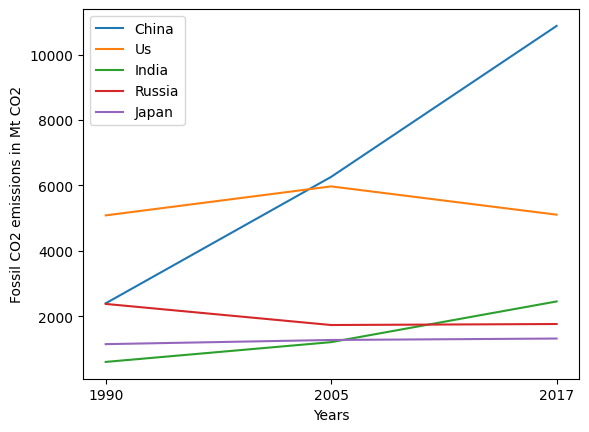

In [120]:
fig = plt.figure()
years = emissions.columns.values.tolist()[0:3] # X as
China = emissions.loc[emissions.index.str.contains('China')].values.flatten()[:3]
US = emissions.loc[emissions.index.str.contains('United States')].values.flatten()[:3]
India = emissions.loc[emissions.index.str.contains('India')].values.flatten()[:3]
Russia = emissions.loc[emissions.index.str.contains('Russia')].values.flatten()[:3]
Japan = emissions.loc[emissions.index.str.contains('Japan')].values.flatten()[:3]

plt.plot(years,China,label='China')
plt.plot(years,US,label='Us')
plt.plot(years,India,label='India')
plt.plot(years,Russia,label='Russia')
plt.plot(years,Japan,label='Japan')

plt.legend()
plt.xlabel('Years')
plt.ylabel('Fossil CO2 emissions in Mt CO2')

plt.show()

In [106]:
# Relative changes added in new columns
emissions['percentage_2005'] = (emissions['2005']/ emissions['1990']) *100
emissions['percentage_2005'] = emissions['percentage_2005'].round(2)

emissions['percentage_2017'] = (emissions['2017']/ emissions['1990']) *100
emissions['percentage_2017'] = emissions['percentage_2017'].round(2)

emissions['percentage_2021'] = (emissions['2021']/ emissions['1990']) *100
emissions['percentage_2021'] = emissions['percentage_2021'].round(2)

emissions

,1990,2005,2017,2021,percentage_2005,percentage_2017,percentage_2021
country,,,,,,,
Afghanistan,2.55,1.06,11.42,8.35,41.75,448.63,327.97
Albania,6.58,4.20,5.03,4.59,63.74,76.35,69.73
Algeria,65.68,98.20,159.93,173.00,149.52,243.51,263.41
Angola,5.85,15.97,30.88,24.45,273.03,527.70,417.88
Anguilla,0.01,0.01,0.03,0.03,233.33,466.67,500.00
...,...,...,...,...,...,...,...
Vietnam,20.18,99.23,218.73,321.41,491.68,"1,083.78","1,592.56"
Western Sahara,0.14,0.23,0.28,0.24,157.64,191.67,166.67
Yemen,6.89,21.77,12.50,12.05,316.07,181.54,174.97


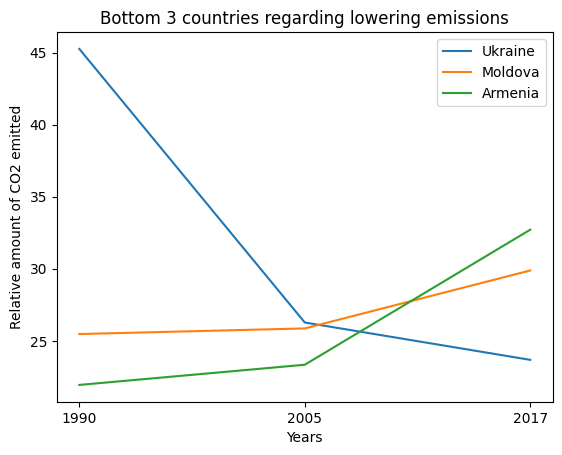

In [102]:
# Find the top three and bottom three countries with regards to lowering these emissions and plot their results.
# y-axis should represent the relative amount of CO2 emitted where the measurement in 1990 is 100%.
# x-axis should have be the years of 1990, 2005 and 2017


#######  DOWN  ########
def down_3():
  down_3_values = emissions.nsmallest(3, 'percentage_2021', keep='all')
  return down_3_values.index.tolist()

fig = plt.figure()
years = emissions.columns.values.tolist()[0:3] # X as

down_nr1 = emissions.loc[emissions.index.str.contains(str(down_3()[0]))].values.flatten()[4:]
down_nr2 = emissions.loc[emissions.index.str.contains(str(down_3()[1]))].values.flatten()[4:]
down_nr3 = emissions.loc[emissions.index.str.contains(str(down_3()[2]))].values.flatten()[4:]
plt.plot(years, down_nr1, label = (down_3()[0]))
plt.plot(years, down_nr2, label = (down_3()[1]))
plt.plot(years, down_nr3, label = (down_3()[2]))

plt.legend()
plt.xlabel('Years')
plt.ylabel('Relative amount of CO2 emitted')
plt.title ('Bottom 3 countries regarding lowering emissions')
plt.show()




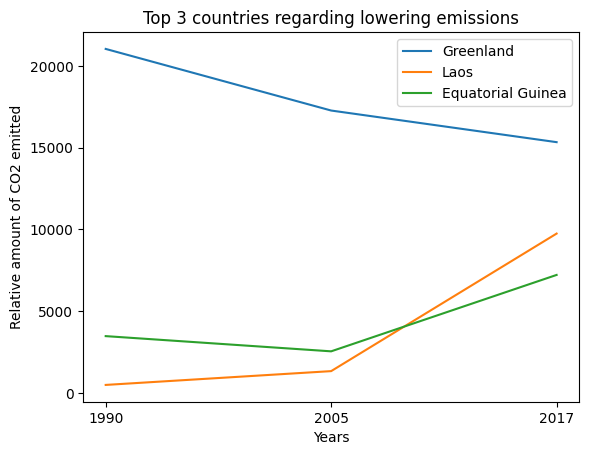

In [121]:
#######  TOP  ########

def top_3():
  top_3_values = emissions.nlargest(3, 'percentage_2021', keep='all')
  return top_3_values.index.tolist()

fig = plt.figure()
years = emissions.columns.values.tolist()[0:3] # X as

top_nr1 = emissions.loc[emissions.index.str.contains(str(top_3()[0]))].values.flatten()[4:]
top_nr2 = emissions.loc[emissions.index.str.contains(str(top_3()[1]))].values.flatten()[4:]
top_nr3 = emissions.loc[emissions.index.str.contains(str(top_3()[2]))].values.flatten()[4:]
plt.plot(years, top_nr1, label = (top_3()[0]))
plt.plot(years, top_nr2, label = (top_3()[1]))
plt.plot(years, top_nr3, label = (top_3()[2]))

plt.legend()
plt.xlabel('Years')
plt.ylabel('Relative amount of CO2 emitted')
plt.title ('Top 3 countries regarding lowering emissions')
plt.show()

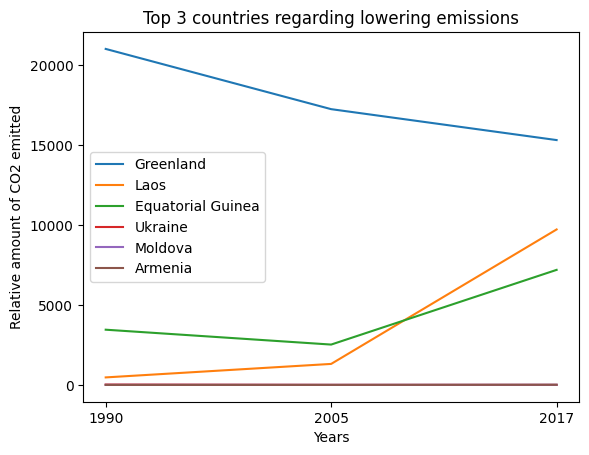

In [103]:
#######  TOP & DOWN TOGETHER ########
def top_3():
  top_3_values = emissions.nlargest(3, 'percentage_2021', keep='all')
  return top_3_values.index.tolist()

def down_3():
  down_3_values = emissions.nsmallest(3, 'percentage_2021', keep='all')
  return down_3_values.index.tolist()

fig = plt.figure()
years = emissions.columns.values.tolist()[0:3] # X as

top_nr1 = emissions.loc[emissions.index.str.contains(str(top_3()[0]))].values.flatten()[4:]
top_nr2 = emissions.loc[emissions.index.str.contains(str(top_3()[1]))].values.flatten()[4:]
top_nr3 = emissions.loc[emissions.index.str.contains(str(top_3()[2]))].values.flatten()[4:]
plt.plot(years, top_nr1, label = (top_3()[0]))
plt.plot(years, top_nr2, label = (top_3()[1]))
plt.plot(years, top_nr3, label = (top_3()[2]))

down_nr1 = emissions.loc[emissions.index.str.contains(str(down_3()[0]))].values.flatten()[4:]
down_nr2 = emissions.loc[emissions.index.str.contains(str(down_3()[1]))].values.flatten()[4:]
down_nr3 = emissions.loc[emissions.index.str.contains(str(down_3()[2]))].values.flatten()[4:]
plt.plot(years, down_nr1, label = (down_3()[0]))
plt.plot(years, down_nr2, label = (down_3()[1]))
plt.plot(years, down_nr3, label = (down_3()[2]))

plt.legend()
plt.xlabel('Years')
plt.ylabel('Relative amount of CO2 emitted')
plt.title ('Top 3 countries regarding lowering emissions')
plt.show()

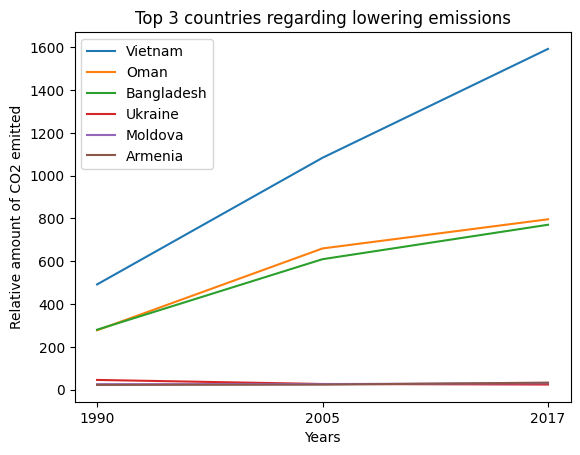

In [116]:
#######  TOP & DOWN TOGETHER: 1990 > 5Mt  ########

emissions_filter = emissions.loc[emissions['1990']>5]

def top_3():
  top_3_values = emissions_filter.nlargest(3, 'percentage_2021', keep='all')
  return top_3_values.index.tolist()

def down_3():
  down_3_values = emissions_filter.nsmallest(3, 'percentage_2021', keep='all')
  return down_3_values.index.tolist()

fig = plt.figure()
years = emissions.columns.values.tolist()[0:3] # X as

top_nr1 = emissions.loc[emissions.index.str.contains(str(top_3()[0]))].values.flatten()[4:]
top_nr2 = emissions.loc[emissions.index.str.contains(str(top_3()[1]))].values.flatten()[4:]
top_nr3 = emissions.loc[emissions.index.str.contains(str(top_3()[2]))].values.flatten()[4:]
plt.plot(years, top_nr1, label = (top_3()[0]))
plt.plot(years, top_nr2, label = (top_3()[1]))
plt.plot(years, top_nr3, label = (top_3()[2]))

down_nr1 = emissions.loc[emissions.index.str.contains(str(down_3()[0]))].values.flatten()[4:]
down_nr2 = emissions.loc[emissions.index.str.contains(str(down_3()[1]))].values.flatten()[4:]
down_nr3 = emissions.loc[emissions.index.str.contains(str(down_3()[2]))].values.flatten()[4:]
plt.plot(years, down_nr1, label = (down_3()[0]))
plt.plot(years, down_nr2, label = (down_3()[1]))
plt.plot(years, down_nr3, label = (down_3()[2]))

plt.legend()
plt.xlabel('Years')
plt.ylabel('Relative amount of CO2 emitted')
plt.title ('Top 3 countries regarding lowering emissions')
plt.show()